**Unzip** the images

In [1]:
!mkdir -p /content/sr_project/HR_raw
!unzip -q "Selected Image for project.zip" -d /content/sr_project/HR_raw

## **Standardize images 256×256**

In [2]:
!pip -q install opencv-python

import cv2, glob
from pathlib import Path

HR_RAW = Path("/content/sr_project/HR_raw")
HR_STD = Path("/content/sr_project/HR_256")
HR_STD.mkdir(parents=True, exist_ok=True)

HR_SIZE = 256
count = 0

paths = []
for ext in ("*.jpg","*.jpeg","*.png","*.webp","*.bmp"):
    paths += glob.glob(str(HR_RAW/"**"/ext), recursive=True)

print("Found images:", len(paths))

for p in sorted(paths):
    img = cv2.imread(p)
    if img is None:
        continue

    h, w = img.shape[:2]
    s = min(h, w)
    y = (h - s)//2
    x = (w - s)//2
    img = img[y:y+s, x:x+s]          # center crop
    img = cv2.resize(img, (HR_SIZE, HR_SIZE), interpolation=cv2.INTER_CUBIC)

    cv2.imwrite(str(HR_STD/f"{count:04d}.jpg"), img)
    count += 1

print("Standardized HR images saved:", count)


Found images: 110
Standardized HR images saved: 110


(256, 256)


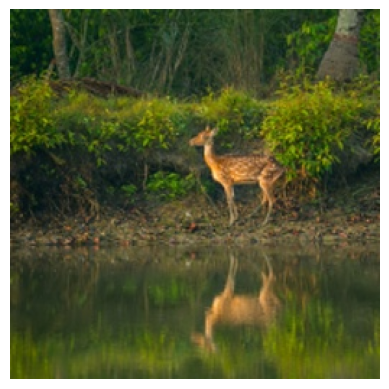

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import random

img = Image.open(sorted(HR_STD.glob("*.jpg"))[random.randint(0, 109)])
plt.imshow(img)
plt.axis("off")
print(img.size)
